In [5]:
import pandas as pd

In [6]:
dataframe = pd.read_csv('egresos_total.csv', sep=',', encoding='latin-1')


C:\Users\Ifcmc\AppData\Local\Temp\ipykernel_14212\1935261035.py:1: DtypeWarning: Columns (0,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('egresos_total.csv', sep=',', encoding='latin-1')


In [7]:
dataframe

,PERTENENCIA_ESTABLECIMIENTO_SALUD,SEXO,GRUPO_EDAD,REGION_RESIDENCIA,GLOSA_REGION_RESIDENCIA,PREVISION,GLOSA_PREVISION,ANO_EGRESO,DIAG1,DIAG2,DIAS_ESTADA,CONDICION_EGRESO,PERTENENCIA_ESTABLECIMIENTO_SALU
0,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,1,De TarapacÃ¡,99,DESCONOCIDO,2001,S611,Y349,1,1,NaN
1,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,1,De TarapacÃ¡,99,DESCONOCIDO,2001,T818,W190,1,1,NaN
2,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,1,De TarapacÃ¡,99,DESCONOCIDO,2001,T818,W190,1,1,NaN
3,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,1,De TarapacÃ¡,99,DESCONOCIDO,2001,S628,W190,1,1,NaN
4,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,1,De TarapacÃ¡,99,DESCONOCIDO,2001,S424,X599,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030176,Pertenecientes al Sistema Nacional de Servicio...,HOMBRE,menor de un aÃ±o,14,De Los RÃ­os,1,FONASA,2021,S526,W090,1,1,NaN
3030177,Pertenecientes al Sistema Nacional de Servicio...,MUJER,menor de un aÃ±o,14,De Los RÃ­os,1,FONASA,2021,T814,Y838,32,1,NaN
3030178,Pertenecientes al Sistema Nacional de Servicio...,MUJER,menor de un aÃ±o,14,De Los RÃ­os,1,FONASA,2021,S341,Y832,57,1,NaN
3030179,Pertenecientes al Sistema Nacional de Servicio...,MUJER,menor de un aÃ±o,14,De Los RÃ­os,1,FONASA,2021,S723,V499,15,1,NaN


In [8]:
dataframe.columns

Index(['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD',
       'REGION_RESIDENCIA', 'GLOSA_REGION_RESIDENCIA', 'PREVISION',
       'GLOSA_PREVISION', 'ANO_EGRESO', 'DIAG1', 'DIAG2', 'DIAS_ESTADA',
       'CONDICION_EGRESO', 'PERTENENCIA_ESTABLECIMIENTO_SALU'],
      dtype='object')

In [ ]:
dataframe['CONDICION_EGRESO'].dtype

dtype('int64')

In [10]:
columas = ['DIAG1', 'CONDICION_EGRESO']


df_analizar = dataframe[dataframe['CONDICION_EGRESO'].isin([1, 2])]

conteo = df_analizar.groupby(['DIAG1', 'CONDICION_EGRESO']).size().reset_index(name='cantidad')

pivot_conteo = conteo.pivot_table(index='DIAG1', columns='CONDICION_EGRESO', values='cantidad', fill_value=0)

pivot_conteo.columns = ['Vivo (1)', 'Fallecido (2)']

pivot_conteo['Total'] = pivot_conteo.sum(axis=1)

pivot_conteo['Efectividad (%)'] = (pivot_conteo['Vivo (1)']/pivot_conteo['Total']) * 100
pivot_conteo = pivot_conteo.sort_values(by='Total', ascending=False).head(10).reset_index()

top_10_diag1 = pivot_conteo.head(10)

top_10_diag1


,DIAG1,Vivo (1),Fallecido (2),Total,Efectividad (%)
0,S069,170577.0,5740.0,176317.0,96.744500
1,S828,133262.0,61.0,133323.0,99.954246
2,S720,114733.0,2892.0,117625.0,97.541339
3,S626,74101.0,14.0,74115.0,99.981110
4,T509,65192.0,241.0,65433.0,99.631684
5,S628,62161.0,24.0,62185.0,99.961405
6,T814,51940.0,670.0,52610.0,98.726478
7,T009,51479.0,254.0,51733.0,99.509017
8,S525,48936.0,21.0,48957.0,99.957105
9,S832,47325.0,10.0,47335.0,99.978874


In [11]:
pivot_conteo

,DIAG1,Vivo (1),Fallecido (2),Total,Efectividad (%)
0,S069,170577.0,5740.0,176317.0,96.744500
1,S828,133262.0,61.0,133323.0,99.954246
2,S720,114733.0,2892.0,117625.0,97.541339
3,S626,74101.0,14.0,74115.0,99.981110
4,T509,65192.0,241.0,65433.0,99.631684
5,S628,62161.0,24.0,62185.0,99.961405
6,T814,51940.0,670.0,52610.0,98.726478
7,T009,51479.0,254.0,51733.0,99.509017
8,S525,48936.0,21.0,48957.0,99.957105
9,S832,47325.0,10.0,47335.0,99.978874


In [12]:
cie10_map = {
    'S069': 'TRAUMATISMO INTRACRANEAL, NO ESPECIFICADO',
    'S828': 'FRACTURA DE LOS HUESOS DE LA COLUMNA VERTEBRAL',
    'S720': 'FRACTURA DE LA CABEZA DEL FÉMUR',
    'S626': 'LESIÓN NO ESPECIFICADA DEL HOMBRO',
    'T509': 'INTENTO DE SUICIDIO POR INTOXICACIÓN DE DROGAS NO ESPECIFICADAS',
    'S628': 'LESIONES NO ESPECIFICADAS EN EL BRAZO',
    'T814': 'COMPLICACIONES DE LAS INTERVENCIONES QUIRÚRGICAS O DE LOS TRAUMATISMOS, NO ESPECIFICADAS',
    'T009': 'TRAUMATISMO NO ESPECIFICADO',
    'S525': 'FRACTURA DE LA CADERA',
    'S832': 'FRACTURA DE LA RODILLA'
}



In [13]:
top_10_diag1['Razon de ingreso'] = top_10_diag1['DIAG1'].map(cie10_map)

top_10_diag1 = top_10_diag1.drop(columns=['DIAG1'])

top_10_diag1 = top_10_diag1[['Razon de ingreso', 'Vivo (1)', 'Fallecido (2)', 'Total', 'Efectividad (%)']]

top_10_diag1


C:\Users\Ifcmc\AppData\Local\Temp\ipykernel_14212\65488158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_diag1['Razon de ingreso'] = top_10_diag1['DIAG1'].map(cie10_map)


,Razon de ingreso,Vivo (1),Fallecido (2),Total,Efectividad (%)
0,"TRAUMATISMO INTRACRANEAL, NO ESPECIFICADO",170577.0,5740.0,176317.0,96.744500
1,FRACTURA DE LOS HUESOS DE LA COLUMNA VERTEBRAL,133262.0,61.0,133323.0,99.954246
2,FRACTURA DE LA CABEZA DEL FÉMUR,114733.0,2892.0,117625.0,97.541339
3,LESIÓN NO ESPECIFICADA DEL HOMBRO,74101.0,14.0,74115.0,99.981110
4,INTENTO DE SUICIDIO POR INTOXICACIÓN DE DROGAS...,65192.0,241.0,65433.0,99.631684
5,LESIONES NO ESPECIFICADAS EN EL BRAZO,62161.0,24.0,62185.0,99.961405
6,COMPLICACIONES DE LAS INTERVENCIONES QUIRÚRGIC...,51940.0,670.0,52610.0,98.726478
7,TRAUMATISMO NO ESPECIFICADO,51479.0,254.0,51733.0,99.509017
8,FRACTURA DE LA CADERA,48936.0,21.0,48957.0,99.957105
9,FRACTURA DE LA RODILLA,47325.0,10.0,47335.0,99.978874


C:\Users\Ifcmc\AppData\Local\Temp\ipykernel_14212\3428361234.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

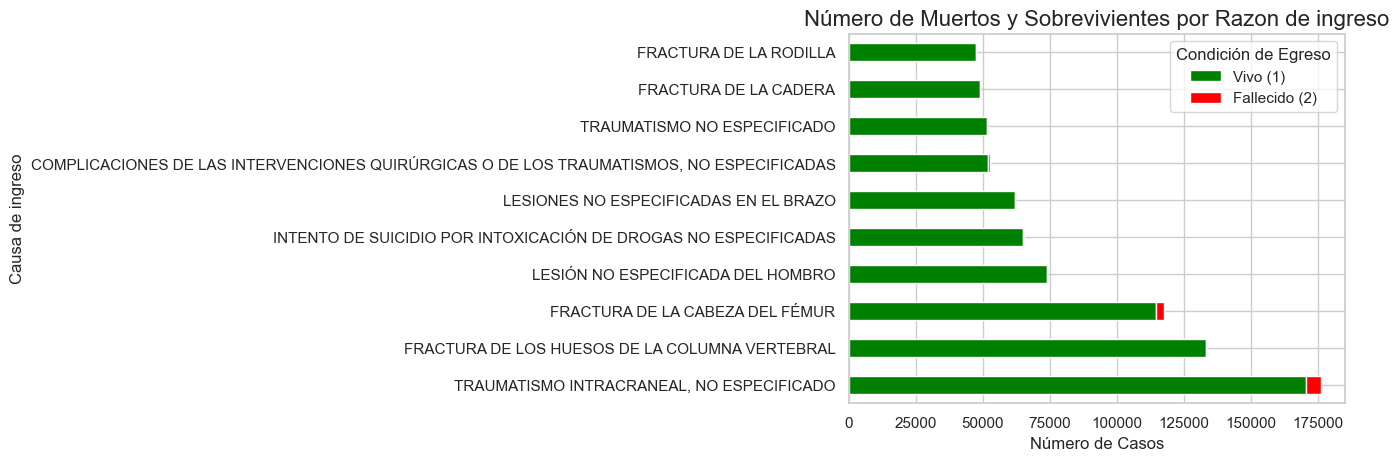

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10)) 

ax = top_10_diag1.set_index('causa de ingreso')[['Vivo (1)', 'Fallecido (2)']].plot(kind='barh', stacked=True, color=['green', 'red'])

plt.title('Número de Muertos y Sobrevivientes por causa de ingreso', fontsize=16)
plt.xlabel('Número de Casos', fontsize=12)
plt.ylabel('Causa de ingreso', fontsize=12)

plt.yticks(rotation=0)  # Cambio a 0 para que no se inclinen las etiquetas

plt.legend(title='Condición de Egreso', labels=['Vivo (1)', 'Fallecido (2)'])

plt.tight_layout()
plt.show()


¿Cuáles son las causas más comunes de ingreso hospitalario (causa interna) y cuál es la distribución de los pacientes vivos y fallecidos para cada una?

causas mas comunes de ingreso:

Traumatismo intracraneal, no especificado es la causa más común con 170577 casos (96.74% de efectividad).
Otras causas frecuentes incluyen fracturas (columna, fémur, etc.) y lesiones en el hombro.

Tasas de efectividad:

La fractura de columna vertebral tiene una alta efectividad (99.95%), con solo 61 muertes.
Las lesiones de hombro tienen una efectividad casi perfecta (99.98%).

Condiciones con más muertes:

Traumatismo intracraneal tiene la mayor cantidad de muertes (5,740), pero con una baja tasa de mortalidad.
Complicaciones quirúrgicas tienen 670 muertes, con una efectividad del 98.73%.

La mayoría de los ingresos hospitalarios son por traumatismos y fracturas, con tasas de mortalidad muy bajas. Las complicaciones quirúrgicas son menos comunes pero tienen una mayor mortalidad.